<a href="https://colab.research.google.com/github/ZsofiaK/masterthesis/blob/main/Exp_FrameSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with Intelligent Frame Selection

Zsófia Katona - Master's Thesis UvA

In [1]:
from typing import List

## OpenCV with Structural Similarity Index

In [43]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [46]:
def calculate_ssim(frame1, frame2):
    """Calculate Structural Similarity Index (SSIM) between two frames."""

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    ssim_score, _ = ssim(gray1, gray2, full=True)

    return ssim_score

In [56]:
def select_frames_ssim(video_path, nr_frames_to_select=10, max_ssim=0.85):
    """
    Select keyframes based on scene change detection using SSIM.
    """

    cap = cv2.VideoCapture(video_path)

    # Check if the video capture object is opened successfully
    if not cap.isOpened():
        print(f"Error: Unable to open video file '{video_path}'")
        return None, None

    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return None, None

    keyframes = [prev_frame]
    selected_indices = [0]  # Index of the first frame

    # Starting from the second frame.
    frame_index = 1

    while True:
        # Read the next frame.
        ret, curr_frame = cap.read()

        # Breaking loop if unable to read frame.
        if not ret:
            print(f"Warning: Unable to read frame at index {frame_index}. Breaking the loop.")
            break

        # Calculate SSIM between consecutive frames
        ssim_score = calculate_ssim(prev_frame, curr_frame)

        # Check if calculate_ssim is returning a valid value
        if ssim_score is None:
            print(f"Error: calculate_ssim returned None for frame at index {frame_index}.")
            cap.release()
            return None, None

        # Select current frame as a keyframe if it is different from the previous one.
        if np.any(ssim_score < max_ssim):
            keyframes.append(curr_frame)
            selected_indices.append(frame_index)

        # Stop when the desired number of keyframes is reached.
        if len(keyframes) == nr_frames_to_select:
            break

        prev_frame = curr_frame
        frame_index += 1

    cap.release()
    return keyframes, selected_indices

In [57]:
def count_frames(video_path):
  '''
  Count the number of frames in a video.
  '''

  cap = cv2.VideoCapture(video_path)

  # Check if the video capture object is opened successfully
  if not cap.isOpened():
      print(f"Error: Unable to open video file '{video_path}'")
      return -1  # Return -1 if the video cannot be opened

  # Get the total number of frames in the video
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  cap.release()  # Release the video capture object

  return total_frames

In [58]:
video_path = '/content/extracted_clip_21.MP4'
selected_frames, selected_indices = select_frames_ssim(video_path, max_ssim=0.95)

In [60]:
print(f'Video path: {video_path}')
print(f'Number of frames in video: {count_frames(video_path)}')
print(f'Selected frame locations: {selected_indices}')

Video path: /content/extracted_clip_21.MP4
Number of frames in video: 1276
Selected frame locations: [0, 43, 103, 163, 223, 283, 343, 403, 463, 523]


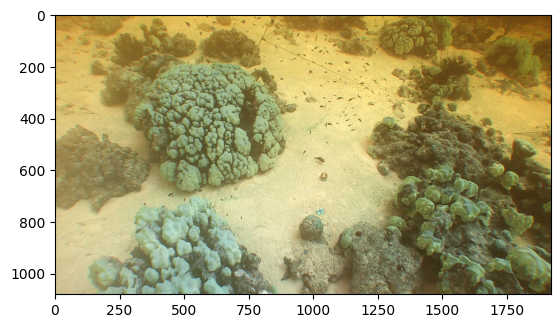

In [61]:
plt.imshow(selected_frames[4])
plt.show()